# Different techniques to deal with Missing Numerical Values

## 3. Capturing NAN values with a new feature

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("titanic.csv",usecols = ['Age','Fare','Survived'])
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [4]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [5]:
df["Age_NAN"] = np.where(df["Age"].isnull(),1,0)
df["Age"].fillna(df.Age.median(),inplace = True)

In [7]:
df.head(20)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


## 4. End of Distribution Imputation

In [8]:
df = pd.read_csv("titanic.csv",usecols = ['Age','Fare','Survived'])
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [9]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

<AxesSubplot:>

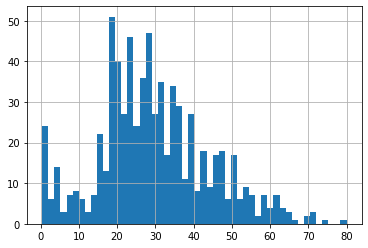

In [12]:
df.Age.hist(bins = 50)

C:\Users\tom97\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

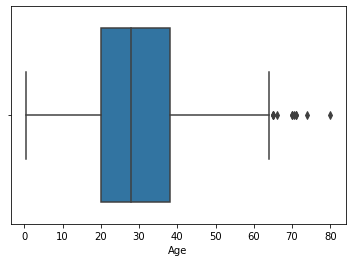

In [14]:
sns.boxplot(df.Age)

In [15]:
median = df.Age.median()
median

28.0

In [17]:
extreme = df.Age.mean() + 3* df.Age.std()
extreme

73.27860964406095

In [18]:
def impute_nan(df,variable,median,extreme):
    df[variable + "_median"] = df[variable].fillna(median)
    df[variable + "_end_of_distribution"] = df[variable].fillna(extreme)

In [19]:
impute_nan(df,"Age",median,extreme)

In [20]:
df.head(20)

,Survived,Age,Fare,Age_median,Age_end_of_distribution
0,0,22.0,7.2500,22.0,22.00000
1,1,38.0,71.2833,38.0,38.00000
2,1,26.0,7.9250,26.0,26.00000
3,1,35.0,53.1000,35.0,35.00000
4,0,35.0,8.0500,35.0,35.00000
5,0,NaN,8.4583,28.0,73.27861
6,0,54.0,51.8625,54.0,54.00000
7,0,2.0,21.0750,2.0,2.00000
8,1,27.0,11.1333,27.0,27.00000
9,1,14.0,30.0708,14.0,14.00000


C:\Users\tom97\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_end_of_distribution'>

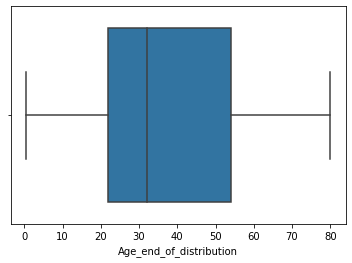

In [21]:
sns.boxplot(df.Age_end_of_distribution)

<AxesSubplot:>

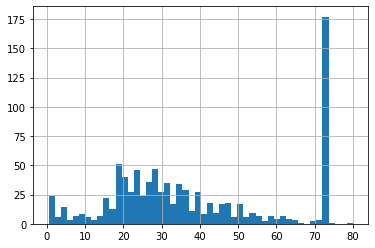

In [22]:
df.Age_end_of_distribution.hist(bins = 50)